In [1]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [2]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images[0,23,23]  # let's have a look at one pixel

194

In [10]:
train_labels[:10]  # let's have a look at the first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

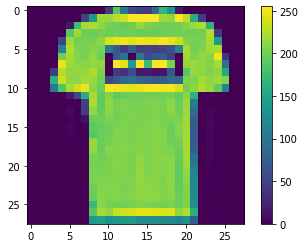

In [20]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [21]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Building the Model

In [22]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

Layer 1: This is our input layer and it will conist of 784 neurons. We use the flatten layer with an input shape of (28,28) to denote that our input should come in in that shape. The flatten means that our layer will reshape the shape (28,28) array into a vector of 784 neurons so that each pixel will be associated with one neuron.

Layer 2: This is our first and only hidden layer. The dense denotes that this layer will be fully connected and each neuron from the previous layer connects to each neuron of this layer. It has 128 neurons and uses the rectify linear unit activation function.

Layer 3: This is our output later and is also a dense layer. It has 10 neurons that we will look at to determine our models output. Each neuron represnts the probabillity of a given image being one of the 10 different classes. The activation function softmax is used on this layer to calculate a probabillity distribution for each class. This means the value of any neuron in this layer will be between 0 and 1, where 1 represents a high probabillity of the image being that class.

Compile the Model

In [23]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Training the Model

In [24]:
model.fit(train_images, train_labels, epochs=10)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6222 - accuracy: 0.7886
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3826 - accuracy: 0.8610
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3360 - accuracy: 0.8752
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3074 - accuracy: 0.8868
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2895 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2772 - accuracy: 0.8962
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2666 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2500 - accuracy: 0.9077
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2413 - accuracy: 0.9105
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.234

Evaluating the Model

In [27]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3326 - accuracy: 0.8841
Test accuracy: 0.8841000199317932


Making Predictions

In [28]:
predictions = model.predict(test_images)

In [29]:
predictions[0]

array([1.1823073e-06, 1.1230086e-08, 8.4629836e-10, 1.1948978e-09,
       3.7196277e-09, 1.0403833e-02, 9.8822399e-09, 4.4096299e-02,
       6.8357817e-09, 9.4549870e-01], dtype=float32)

In [30]:
np.argmax(predictions[0])

9

In [31]:
test_labels[0]

9

Verifying Predictions

Pick a number: g
Try again...
Pick a number: y
Try again...
Pick a number: 5


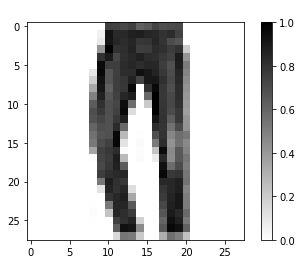

In [36]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)